In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set()

In [20]:
data = pd.read_csv('SAT_and_GPA_with_Attandence.csv')

data['Attendance_Map'] = data['Attendance'].map({'Yes':1, 'No':0})

data

,SAT,GPA,Attendance,Attendance_Map
0,1714,2.40,No,0
1,1664,2.52,No,0
2,1760,2.54,No,0
3,1685,2.74,No,0
4,1693,2.83,No,0
5,1670,2.91,No,0
6,1764,3.00,No,0
7,1764,3.00,No,0
8,1792,3.01,No,0
9,1850,3.01,No,0


In [21]:
data.describe()

,SAT,GPA,Attendance_Map
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


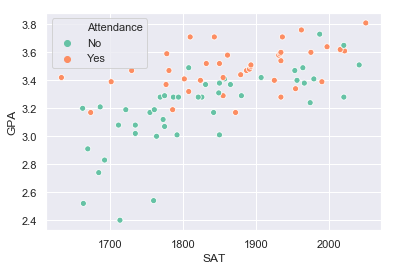

In [33]:
ax = sns.scatterplot(x='SAT', y='GPA', hue='Attendance', palette='Set2', data=data)
# w/ Atttandance, there may be an opportunity for better regression.

In [34]:
# we need OLS w/ constant **for lineer regression**
y = data['GPA']
x = sm.add_constant(data[['SAT', 'Attendance_Map']])

results = sm.OLS(y, x).fit()
results.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           2.19e-15
Time:                        10:49:58   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6439      0.358      1.797      0.076      -0.069       1.357
SAT                0.0014      0.000      7.141      0.000       0.001       0.002
Attendance_Map     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  lineer function

y(GPA) = 0.6439 + 0.0014 * x1(SAT) + 0.2226x2(Attendance)



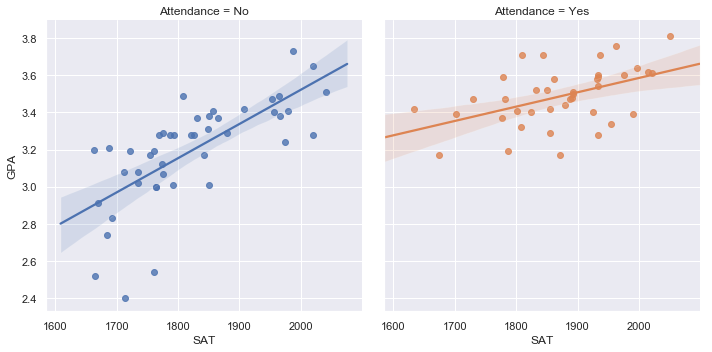

In [32]:
# sns.regplot(x="SAT", y="GPA", data=data);
sns.lmplot(x="SAT", y="GPA", col='Attendance', data=data, hue='Attendance');
